In [2]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
def showimage(myimage, figsize=[10,10]):
    if (myimage.ndim>2):
        myimage = myimage[:, :, ::-1]
        
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(myimage, cmap='grey', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()

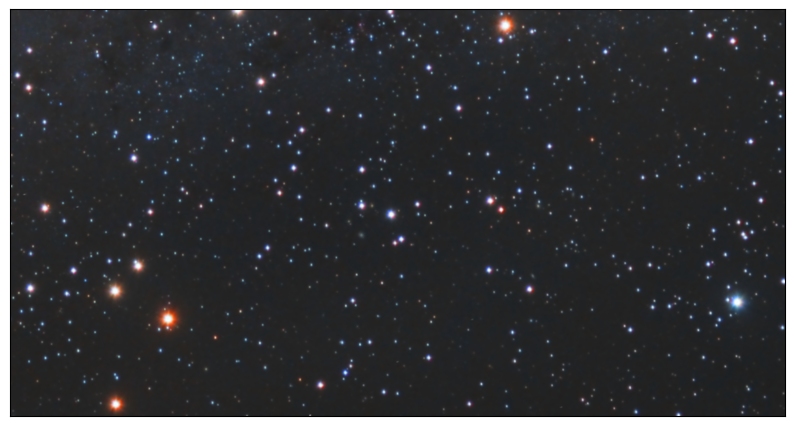

In [ ]:
colorimage=cv2.imread('starcolour-link.png')
showimage(colorimage)

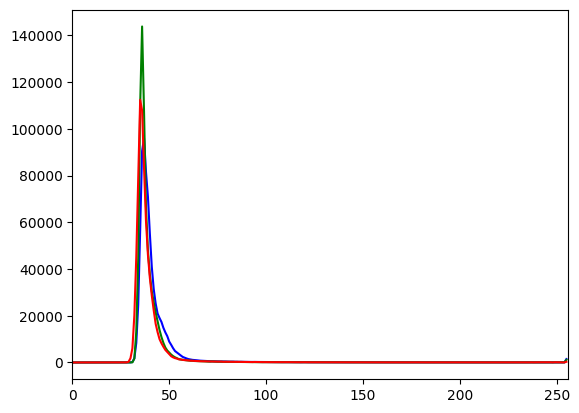

In [5]:
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    hist = cv2.calcHist([colorimage],[i],None,[256],[0,256])
    
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.show()

In [6]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

colorimage_b = clahe.apply(colorimage[:,:,0])
colorimage_g = clahe.apply(colorimage[:,:,1])
colorimage_r = clahe.apply(colorimage[:,:,2])

'''colorimage_b = cv2.equalizeHist(colorimage[:,:,0])
colorimage_g = cv2.equalizeHist(colorimage[:,:,1])
colorimage_r = cv2.equalizeHist(colorimage[:,:,2])'''
colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
colorimage_e.shape

(630, 1200, 3)

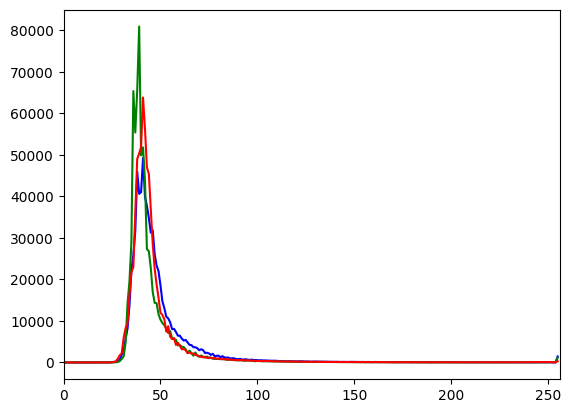

In [7]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist, _ = np.histogram(colorimage_e[:,:,i], 256, [0,256])
    
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.show()

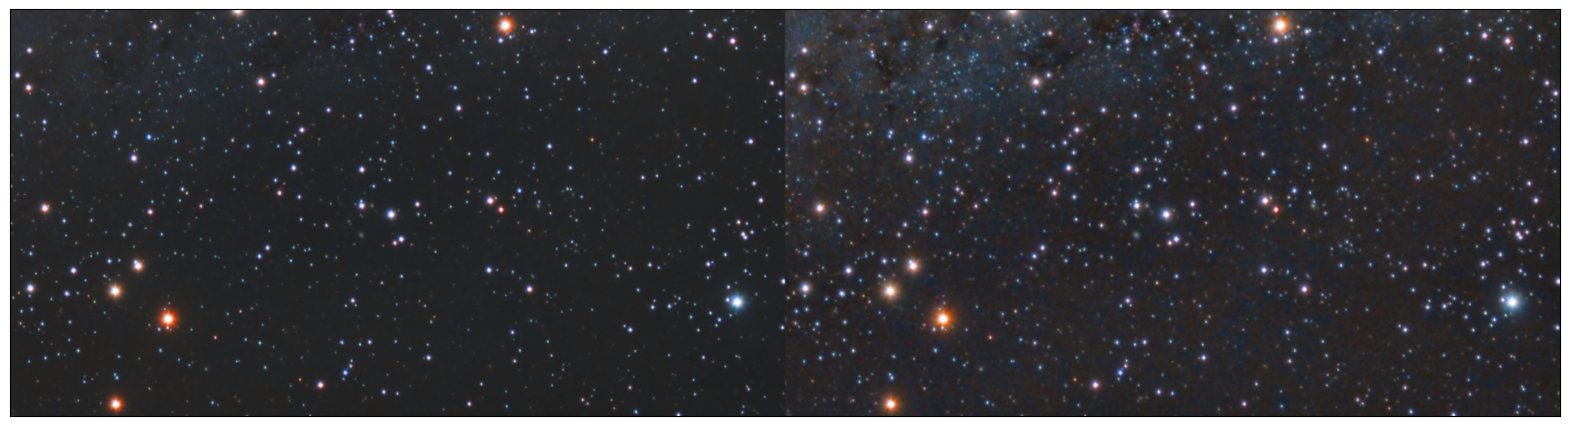

In [8]:
showimage((np.hstack((colorimage, colorimage_e))), [20,10])